In [1]:
from main import *
import os 

# Felzenszwalb / Watershed

In [ ]:
category = ["cat","person","chair","bicycle"]
k_range = np.arange(50,1150,100)
d_input_path = {cat : os.listdir(f"../data/VOC2012_train_val/JPEGImages/{cat}/") for cat in category}
abo_felzenszwalb = {cat : {f : [] for f in d_input_path[cat]} for cat in category}
abo_watershed = {cat : {f : [] for f in d_input_path[cat]} for cat in category}

for cat in category:
    for img_path in d_input_path[cat]:
        
        input_path = f"../data/VOC2012_train_val/JPEGImages/{cat}/{img_path}"
        print(input_path,end='\n\n')

        for k in k_range:
            print(f'felzenszwalb : k = {k}',end='\n')
            bb_f, _ = segmentation(input_path,method="felzenszwalb",kwargs={"sigma" : 0.5, "k" : k, "min_size" : 50},category=cat,save=True)
            abo_felzenszwalb[cat][img_path] += [bb_f.abo[cat]]
            
            print(f'watershed : n_comp = {bb_f.get_nb_bndbox()}',end='\n')
            bb_w, _ = segmentation(input_path,method="watershed",kwargs={"k" : k},n_comp=bb_f.get_nb_bndbox()-1,category=cat,save=True)
            abo_watershed[cat][img_path] += [bb_w.abo[cat]]


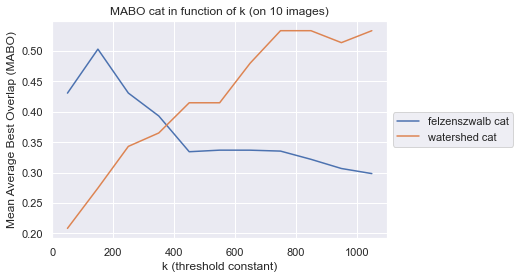

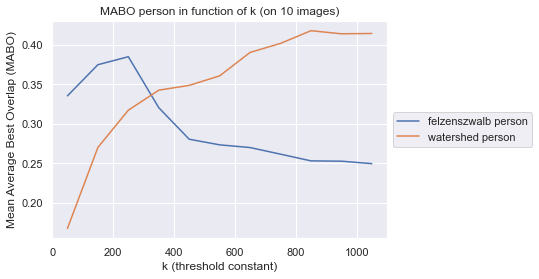

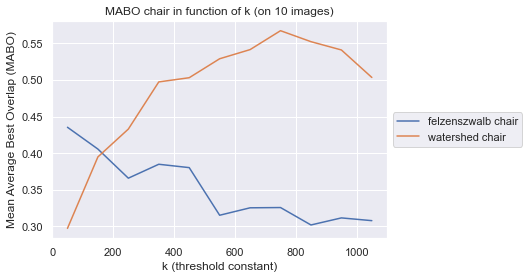

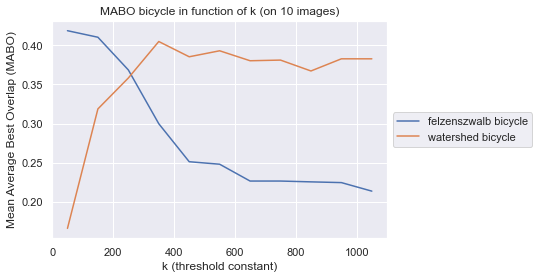

In [7]:
import seaborn as sns; sns.set()

for cat in category:
    plt.plot(k_range,np.mean(np.array([abo_felzenszwalb[cat][img] for img in abo_felzenszwalb[cat]]),axis=0),label=f"felzenszwalb {cat}")
    plt.plot(k_range,np.mean(np.array([abo_watershed[cat][img] for img in abo_watershed[cat]]),axis=0),label=f"watershed {cat}")
    plt.xlabel("k (threshold constant)")
    plt.ylabel("Mean Average Best Overlap (MABO)")
    lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f"MABO {cat} in function of k (on 10 images)")
    plt.savefig(f"../result/mabo_{cat}",bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [24]:
# saving abo dictionnary result due to total executing time 

import pickle 

#with open('../result/abo_felzenszwalb.pkl', 'wb') as fp:
#    pickle.dump(abo_felzenszwalb, fp)

#with open('../result/abo_watershed.pkl', 'wb') as fp:
#    pickle.dump(abo_watershed, fp)

In [5]:
# load from pkl

import pickle 

# with open('../result/abo_felzenszwalb.pkl', 'rb') as fp:
#    abo_felzenszwalb = pickle.load(fp)

#with open('../result/abo_watershed.pkl', 'rb') as fp:
#    abo_watershed = pickle.load(fp)

category = ["cat","person","chair","bicycle"]
k_range = np.arange(50,1150,100)